In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("precision", 2)

# Creating model object and indicating path
data_path = "../../../input/BES/dionisos_horizons_v2/"
geo_model = gp.create_model("Dionisos_Horizons_BES_v2")

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 175000, 0, 150000, -15000, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "Horizons_1_2_27_merged_test.csv",
    path_o=data_path + "orientations_points.csv",
)

Active grids: ['regular']


Dionisos_Horizons_BES_v2  2023-09-21 11:32

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,Horizon_1,Default series,1,#015482,1
1,Horizon_2,Default series,2,#9f0052,2
2,Horizon_27,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "Horizon_1",
            "Horizon_2",
            "Horizon_27",
        ),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,Horizon_1,Strat_Series,1,#015482,1
1,Horizon_2,Strat_Series,2,#9f0052,2
2,Horizon_27,Strat_Series,3,#ffbe00,3
3,basement,Basement_series,1,#728f02,4


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_1": ("Horizon_1",),
        "Strat_Series_2": ("Horizon_2",),
        "Strat_Series_3": ("Horizon_27",),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,Horizon_1,Strat_Series_1,1,#015482,1
1,Horizon_2,Strat_Series_2,1,#9f0052,2
2,Horizon_27,Strat_Series_3,1,#ffbe00,3
3,basement,Basement_series,1,#728f02,4


In [5]:
geo_model.get_data()

X         Y      Z    smooth     surface  \
surface_points 0          0.0       0.0  -1503  2.00e-06   Horizon_1   
               1       5000.0       0.0  -1574  2.00e-06   Horizon_1   
               2      10000.0       0.0  -1645  2.00e-06   Horizon_1   
               3      15000.0       0.0  -1720  2.00e-06   Horizon_1   
               4      20000.0       0.0  -1786  2.00e-06   Horizon_1   
...                       ...       ...    ...       ...         ...   
               3344  160000.0  150000.0 -11021  2.00e-06  Horizon_27   
               3345  165000.0  150000.0 -10849  2.00e-06  Horizon_27   
               3346  170000.0  150000.0 -10979  2.00e-06  Horizon_27   
               3347  175000.0  150000.0 -11002  2.00e-06  Horizon_27   
orientations   0      90000.0   75000.0  -2267  1.00e-02   Horizon_1   

                          G_x       G_y  G_z  
surface_points 0          NaN       NaN  NaN  
               1          NaN       NaN  NaN  
               2          NaN       NaN  NaN  
               3          NaN       NaN  NaN  
               4          NaN       NaN  NaN  
...                       ...       ...  ...  
               3344       NaN       NaN  NaN  
               3345       NaN       NaN  NaN  
               3346       NaN       NaN  NaN  
               3347       NaN       NaN  NaN  
orientations   0     1.00e-12  1.00e-12  1.0  

[3349 rows x 8 columns]

In [6]:
geo_model.set_default_orientation()

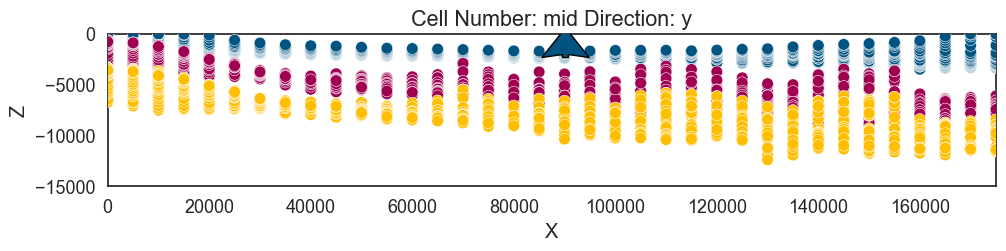

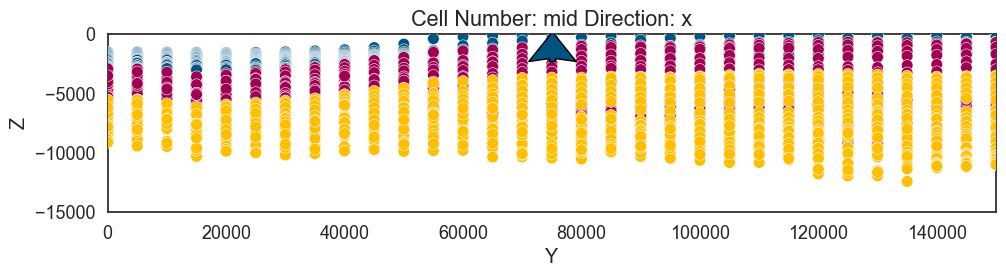

In [6]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=2, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [ ]:
# geo_model.set_default_orientation()

In [8]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=1,
)

In [9]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range                230976.19
$C_o$            1270238095.24
drift equations         [3, 3]
Wall time: 22.2 s


In [10]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

Wall time: 1min 11s



Lithology ids 
  [1.         1.         1.         ... 3.0706955  2.85532313 2.60374959] 

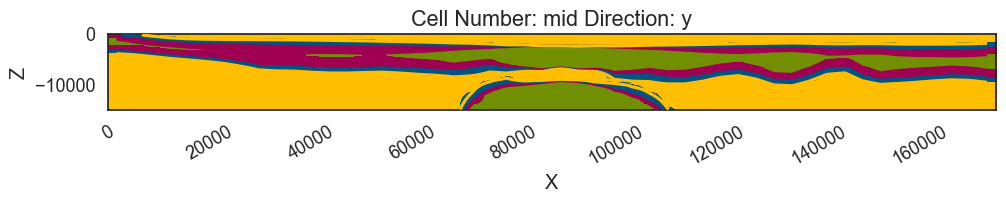

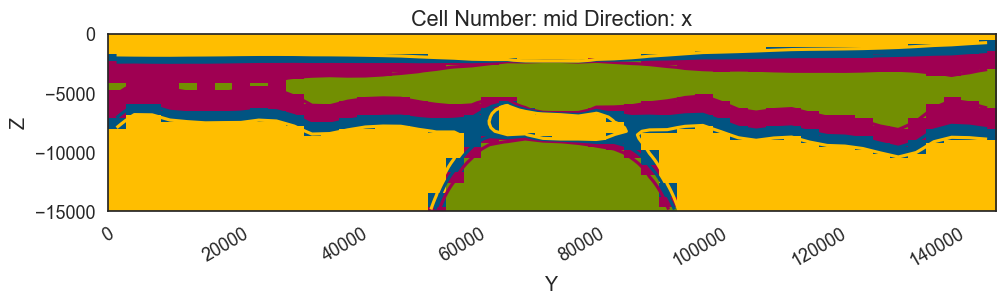

In [11]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [12]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=10)

In [ ]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)